<a href="https://colab.research.google.com/github/msruan/tec_2025.1/blob/main/tbfinal_arvores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalando repositório de datasets

In [ ]:
pip install ucimlrepo

## Identificadores dos Respositorios

In [ ]:
IRIS_DATASET_ID_UCIREPO = 53

BREAST_CANCER_DATASET_ID_UCIREPO = 17

## Funções Auxiliares

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

def run_validation(modelo, X_test, y_test, nome_classes=None):
    print("--- VALIDAÇÃO DO MODELO ---")
    y_pred = modelo.predict(X_test)

    print("\n * Relatório de Classificação:\n")
    print(classification_report(y_test, y_pred, target_names=nome_classes))

    acc = accuracy_score(y_test, y_pred)
    print("-----------------------------------------")
    print(f"* Acurácia Global: {acc:.4f} ({acc:.2%})")
    print("-----------------------------------------")

    print(" * Matriz de Confusão:")
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=nome_classes if len(nome_classes) else modelo.classes_,
                yticklabels=nome_classes if len(nome_classes) else modelo.classes_)
    plt.title('Matriz de Confusão')
    plt.ylabel('Verdadeiro (Real)')
    plt.xlabel('Previsto (Modelo)')
    plt.show()

# Árvores de Decisão
Explorando árvores de decisão dos datasets de câncer de mama e iris.


In [55]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn import tree

def run_decision_tree(dataset, target_column="class", test_size=0.2, random_state=42):

  # Criar DataFrame
  data = dataset.data.original

  df = pd.DataFrame(data)

  # Separa as features em X e os targets em y
  x=df.drop(columns=[target_column], errors="ignore")
  y=df[target_column]


  # Separar entre dados de validacao e teste
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)

  # Criar e treinar o classificador com entropia
  modelo = DecisionTreeClassifier(criterion='entropy', random_state=42)
  modelo.fit(x_train, y_train)


  # Exibindo as regras da árvore de decisão
  regras = export_text(modelo, feature_names=x.columns.tolist())
  print(regras)

  # Plotar a árvore de decisão
  plt.figure(figsize=(14,8))
  tree.plot_tree(
    modelo,
    feature_names=x.columns,
    class_names=[str(c) for c in y.unique()],
    filled=True,
    rounded=True
  )
  plt.title("Árvore de Decisão (baseada em Entropia - ID3)")
  plt.show()

  run_validation(modelo, x_test, y_test, nome_classes=y.unique())

  df.head()

## Base de dados: *IRIS DATASET*

|--- petal length <= 2.45
|   |--- class: Iris-setosa
|--- petal length >  2.45
|   |--- petal length <= 4.75
|   |   |--- petal width <= 1.65
|   |   |   |--- class: Iris-versicolor
|   |   |--- petal width >  1.65
|   |   |   |--- class: Iris-virginica
|   |--- petal length >  4.75
|   |   |--- petal width <= 1.75
|   |   |   |--- petal length <= 4.95
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- petal length >  4.95
|   |   |   |   |--- petal width <= 1.55
|   |   |   |   |   |--- class: Iris-virginica
|   |   |   |   |--- petal width >  1.55
|   |   |   |   |   |--- petal length <= 5.45
|   |   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |   |--- petal length >  5.45
|   |   |   |   |   |   |--- class: Iris-virginica
|   |   |--- petal width >  1.75
|   |   |   |--- petal length <= 4.85
|   |   |   |   |--- sepal width <= 3.10
|   |   |   |   |   |--- class: Iris-virginica
|   |   |   |   |--- sepal width >  3.10
|   |   |   |   |   |--- class: Iris-v

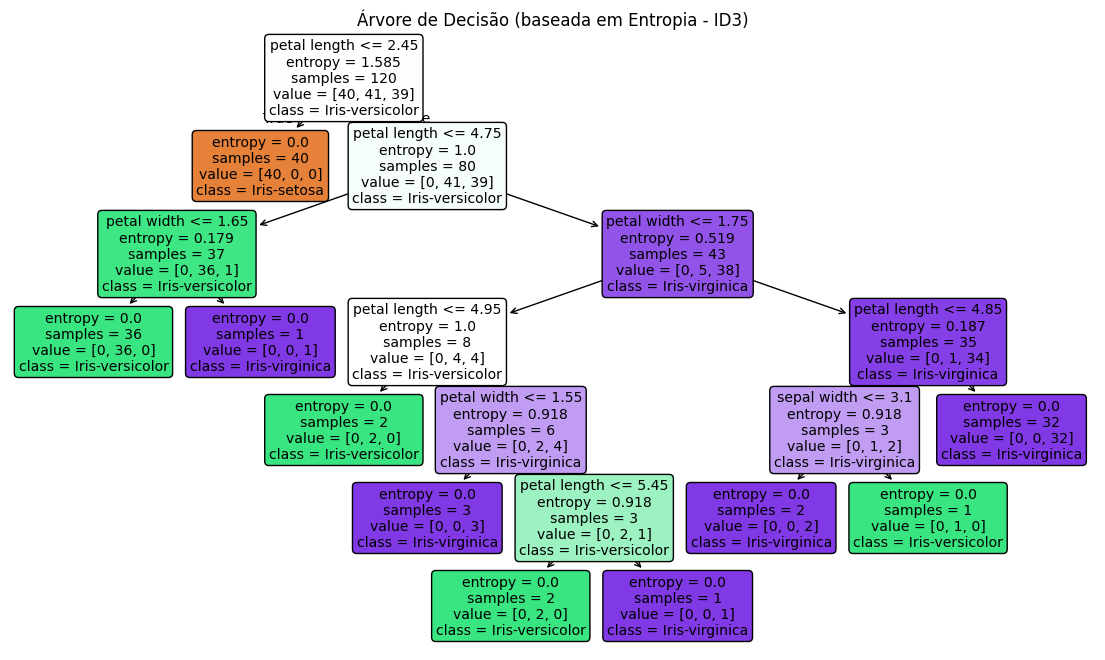

--- VALIDAÇÃO DO MODELO ---

 * Relatório de Classificação:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

-----------------------------------------
* Acurácia Global: 1.0000 (100.00%)
-----------------------------------------
 * Matriz de Confusão:


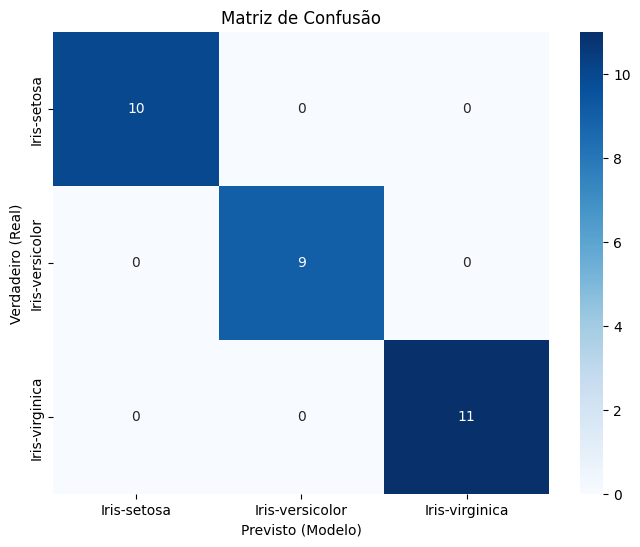

In [61]:
from ucimlrepo import fetch_ucirepo

iris_dataset = fetch_ucirepo(id=IRIS_DATASET_ID_UCIREPO)
run_decision_tree(iris_dataset)

## Base de dados: *BREAST* CANCER

|--- concave_points1 <= 0.05
|   |--- radius3 <= 16.83
|   |   |--- area2 <= 48.70
|   |   |   |--- texture3 <= 30.15
|   |   |   |   |--- class: B
|   |   |   |--- texture3 >  30.15
|   |   |   |   |--- radius3 <= 14.43
|   |   |   |   |   |--- class: B
|   |   |   |   |--- radius3 >  14.43
|   |   |   |   |   |--- perimeter1 <= 86.26
|   |   |   |   |   |   |--- ID <= 4944421.00
|   |   |   |   |   |   |   |--- class: M
|   |   |   |   |   |   |--- ID >  4944421.00
|   |   |   |   |   |   |   |--- class: B
|   |   |   |   |   |--- perimeter1 >  86.26
|   |   |   |   |   |   |--- class: B
|   |   |--- area2 >  48.70
|   |   |   |--- symmetry2 <= 0.02
|   |   |   |   |--- class: M
|   |   |   |--- symmetry2 >  0.02
|   |   |   |   |--- class: B
|   |--- radius3 >  16.83
|   |   |--- texture3 <= 19.91
|   |   |   |--- class: B
|   |   |--- texture3 >  19.91
|   |   |   |--- concave_points2 <= 0.01
|   |   |   |   |--- class: M
|   |   |   |--- concave_points2 >  0.01
|   |   |   |   |--

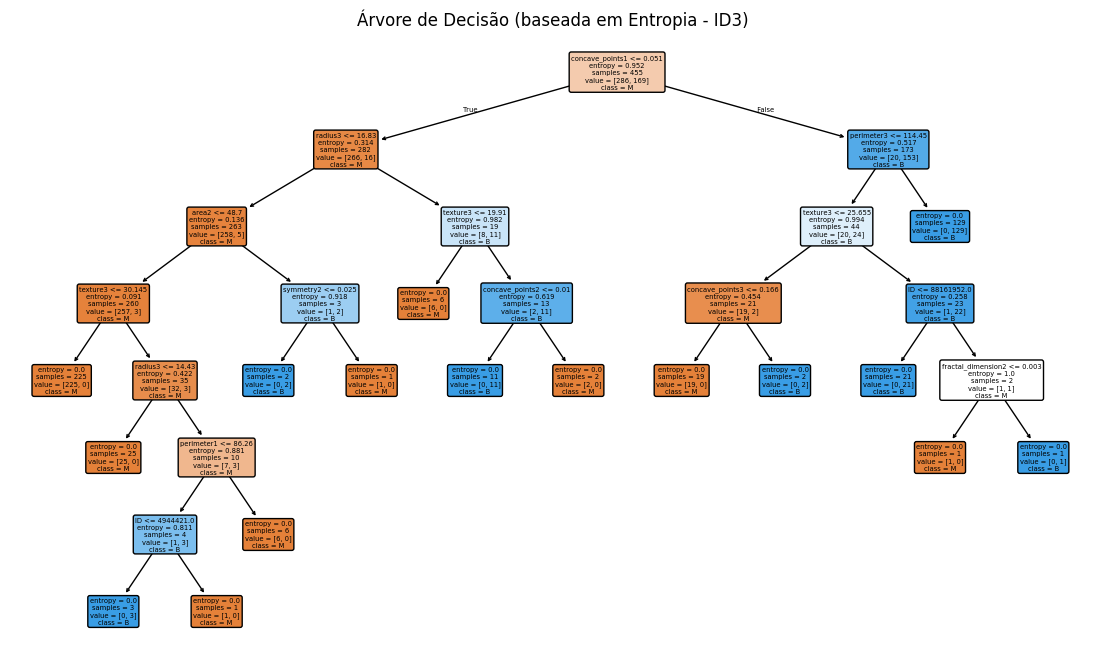

--- VALIDAÇÃO DO MODELO ---

 * Relatório de Classificação:

              precision    recall  f1-score   support

           M       0.95      0.99      0.97        71
           B       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

-----------------------------------------
* Acurácia Global: 0.9561 (95.61%)
-----------------------------------------
 * Matriz de Confusão:


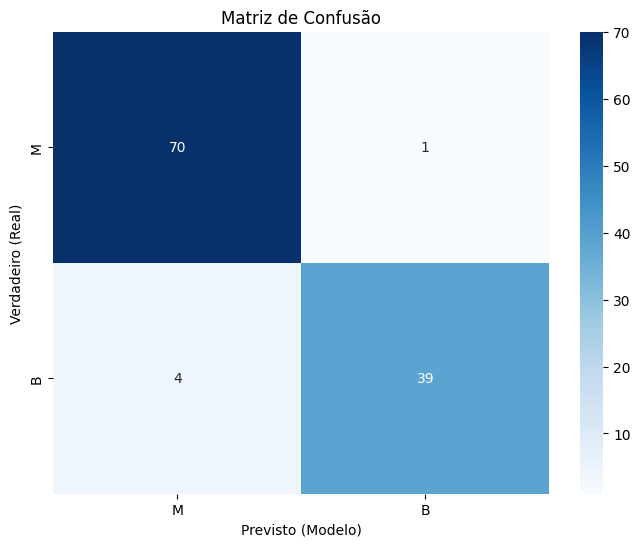

In [60]:
from ucimlrepo import fetch_ucirepo

breast_cancer_dataset = fetch_ucirepo(id=BREAST_CANCER_DATASET_ID_UCIREPO)
run_decision_tree(breast_cancer_dataset, target_column="Diagnosis")

# Naive Bayes
Agora vamos utilizar para as mesmas bases de dados o algoritmo NaiveBayes

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import Bunch

def run_naive_bayes_classifier(dataset: Bunch, test_size=0.2, random_state=80):
  X = dataset.data
  y = dataset.target

  # Dividir entre treino e teste
  X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=test_size, random_state=random_state
  )  # test_size de 0.3 no original, random_state=80 no Ryan

  # Criar o modelo Naive Bayes
  model = GaussianNB()

  # Treinar o modelo
  model.fit(X_train, y_train)

  # Fazer previsões
  y_pred = model.predict(X_test)

  # Avaliar o modelo
  run_validation(model, X_test, y_test, nome_classes=dataset.target_names)

## Iris Dataset



--- VALIDAÇÃO DO MODELO ---

 * Relatório de Classificação:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

-----------------------------------------
* Acurácia Global: 1.0000 (100.00%)
-----------------------------------------
 * Matriz de Confusão:


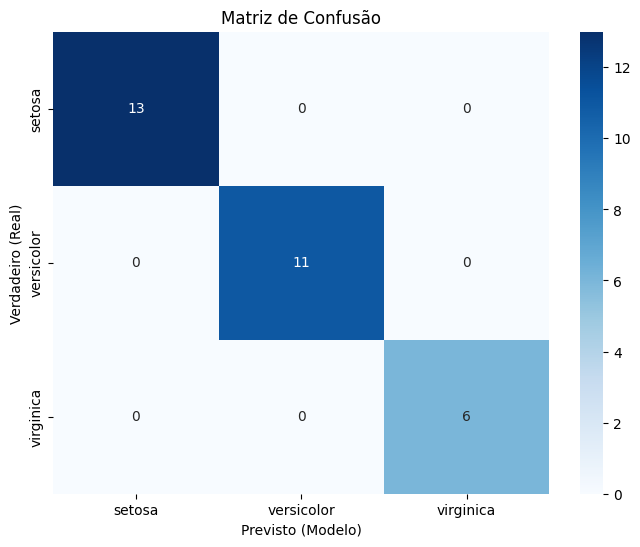

In [49]:
from sklearn.datasets import load_iris

# Carregar dataset Iris
iris = load_iris()

run_naive_bayes_classifier(iris)

## Breast Cancer

--- VALIDAÇÃO DO MODELO ---

 * Relatório de Classificação:

              precision    recall  f1-score   support

   malignant       1.00      0.86      0.93        44
      benign       0.92      1.00      0.96        70

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

-----------------------------------------
* Acurácia Global: 0.9474 (94.74%)
-----------------------------------------
 * Matriz de Confusão:


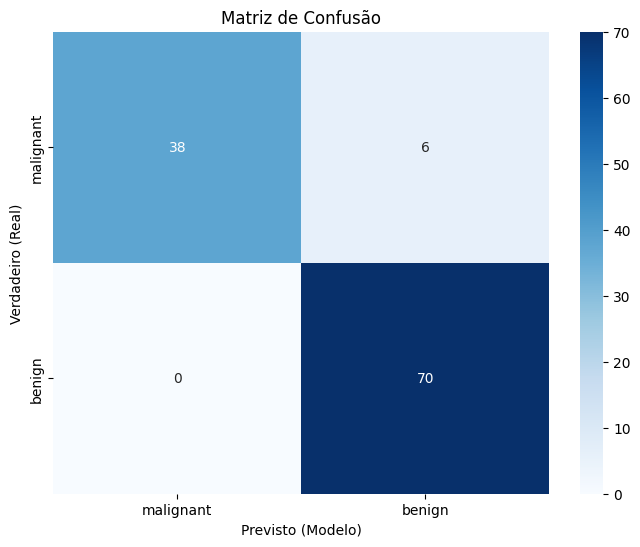

In [47]:
from sklearn.datasets import load_breast_cancer

# Carregar dataset Breast Cancer
breast_cancer = load_breast_cancer()

run_naive_bayes_classifier(breast_cancer)

# K-Nearest Neighbors
Por fim, o algorimot KNN será aplicado às bases de dados

## Iris Dataset



--- VALIDAÇÃO DO MODELO ---

 * Relatório de Classificação:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

-----------------------------------------
* Acurácia Global: 0.9778 (97.78%)
-----------------------------------------
 * Matriz de Confusão:


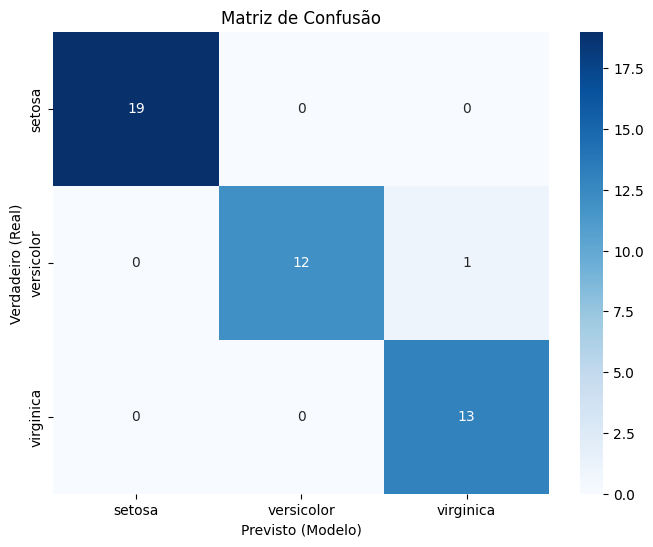

## Breast Cancer

--- VALIDAÇÃO DO MODELO ---

 * Relatório de Classificação:

              precision    recall  f1-score   support

           M       0.61      0.97      0.75        70
           B       0.00      0.00      0.00        44

    accuracy                           0.60       114
   macro avg       0.30      0.49      0.37       114
weighted avg       0.37      0.60      0.46       114

-----------------------------------------
* Acurácia Global: 0.5965 (59.65%)
-----------------------------------------
 * Matriz de Confusão:


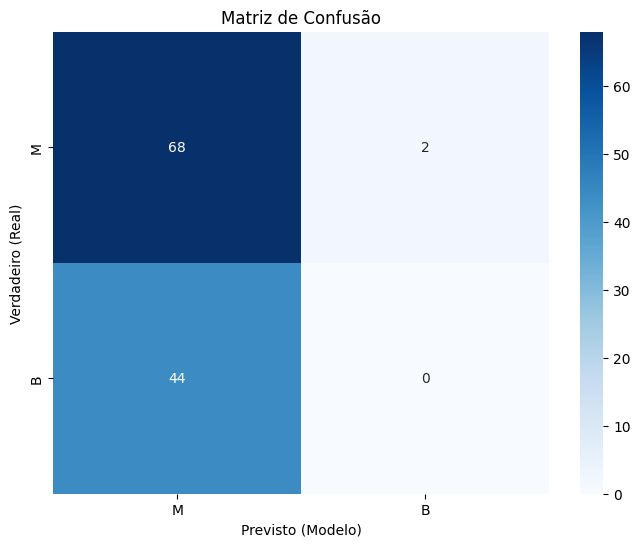

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

x, y, original, _ = fetch_dataset(BREAST_CANCER_DATASET_ID)

x_prepared, y_prepared = prepare_raw_dataset(original, target_column="Diagnosis")
x_train, x_test, y_train, y_test = train_test_split(x_prepared, y_prepared, test_size=0.2, random_state=80)

modelo = GaussianNB()
modelo.fit(x_train, y_train)
run_validation(modelo, x_test, y_test, nome_classes=y_prepared.unique())